# Visualisera regressionskoefficienter med `coefplot`

*Av Anders Sundell*

Tabeller kan visa mycket information, men den kan vara svår att ta till sig, intuitivt. Helst vill vi presentera resultat så enkelt så möjligt, så att läsaren inte ska behöva anstränga sig för att förstå vad det är vi försöker kommunicera.

Med regressionsanalys kan det bli särskilt påtagligt. Ofta blir det att man bara ögnar igenom tabeller för att leta efter signifikansstjärnor vid koefficienter. Det är olyckligt eftersom det egentligen inte går någon magisk gräns vid de konventionella signifikansnivåerna, som p<0,05. Dessutom skiljer man på det viset inte mellan koefficienter som skattats precist kring noll (vilket alltså betyder att vi kan vara säkra på att effekten faktiskt är noll) och koefficienter som skattats med väldigt stor osäkerhet (och som dåp kan vara noll eller någonting helt annat).

Allt fler väljer därför att visa regressionskoefficienter grafiskt, med konfidensintervall. Graferna gör det lättare att jämföra koefficienter, visar vad som är signifikant (konfidensintervallen överlappar inte noll) och visar samtidigt graden av osäkerhet (konfidensintervallens bredd).

Som standard visar Stata konfidensintervallen i regressionstabellerna, men det finns också ett användarbyggt kommando som snabbt låter oss göra en prydlig graf. Det heter `coefplot`.

I den här guiden ska vi gå igenom hur man gör en sådan koefficientplot, och också hur man gör för att få den att visa standardiserade regressionskoefficienter.

## Installera `coefplot`

Eftersom det är användarskapat måste vi först installera `coefplot`. Det gör vi genom att skriva:

In [2]:
ssc install coefplot, replace

checking coefplot consistency and verifying not already installed...
all files already exist and are up to date.


## En regressionsanalys med några variabler

Vi laddar sedan in QoG-datan för att ha något att jobba med:

In [3]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


Vi gör sedan en regressionsanalys där graden av korruption (ti_cpi - kodat så att högre värden betyder mindre korruption) är den beroende variabeln, och graden av demokrati (p_polity2), BNP per capita (gle_rgdpc), avståndet från ekvatorn (lp_lat_abst) och graden av etnisk fragmentering (al_ethnic) är oberoende variabler.

In [5]:
reg ti_cpi p_polity2 gle_rgdpc lp_lat_abst al_ethnic


      Source |       SS           df       MS      Number of obs   =       133
-------------+----------------------------------   F(4, 128)       =     62.20
       Model |  35203.5053         4  8800.87633   Prob > F        =    0.0000
    Residual |  18112.0135       128  141.500105   R-squared       =    0.6603
-------------+----------------------------------   Adj R-squared   =    0.6497
       Total |  53315.5188       132  403.905445   Root MSE        =    11.895

------------------------------------------------------------------------------
      ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   .7902483   .1782931     4.43   0.000     .4374649    1.143032
   gle_rgdpc |    .000788   .0000843     9.35   0.000     .0006212    .0009547
 lp_lat_abst |   19.94143   8.250433     2.42   0.017     3.616537    36.26632
   al_ethnic |  -5.225239   4.711059    -1.11   0.

Variablerna har lite olika effekt: Graden av demokrati (p_polity2), ekonomisk utveckling (gle_rgdpc) och avstånd från ekvatorn (lp_lat_abst) har alla en positiv koefficient, och är signifikanta (p-värdet är under 0,05). Etnisk fragmentering (al_ethnic) har en negativ effekt, vilket betyder att mer etnisk fragmentering hänger ihop med mer korruption, eftersom variabeln ti_cpi är kodad så att högre värden är "bättre". Den här variabeln är dock inte statistiskt signifikant, eftersom p-värdet överstiger 0,05.

## Visualisera ostandardiserade koefficienter med `coefplot`

Nu ska vi göra en koefficientplot. Det är enkelt: efter att ha kört regressionsanalysen skriver vi bara `coefplot`. Vi lägger direkt till ett option också, som ritar ut en linje på 0-strecket `xline(0)`. Alla koefficienter vars konfidensintervall som inte överlappar strecket är signifikanta.

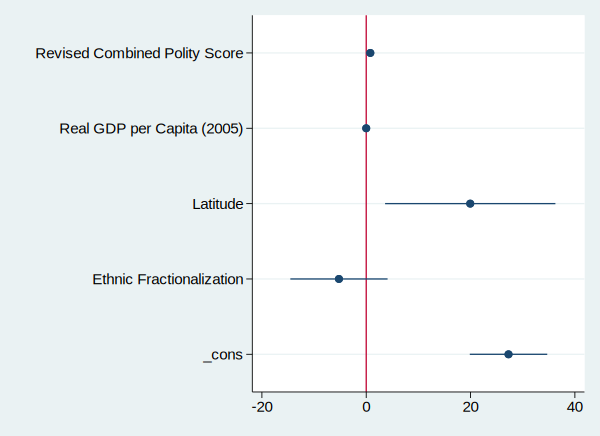

In [7]:
coefplot, xline(0)

Mycket enkelt! Här ser vi nu grafiskt vad vi såg i tabellen ovan. Etnisk fragmentering återfinns till vänster, på den negativa sidan, och konfidensintervallen (som visas med strecken) överlappar noll, vilket betyder att koefficienten inte är signifikant. Ju längre bort från det röda strecket punkten är, desto starkare effekt.

Men när det fäller demokrati och BNP per capita så kan vi inte se några konfidensintervall, och det verkar nästan som om prickarna överlappar noll. Vad innebär det?

Jo, bara att koefficienterna och konfidensintervallen är väldigt små. BNP till exempel är här mätt i antal dollar per capita. Och naturligtvis kan vi inte förvänta oss att så mycket händer med korruptionsnivån om vi ökar BNP per capita med en dollar. Koefficienten är 0,0008, och konfidensintervallet går mellan 0,0006 och 0,0009. Skalan är helt annorlunda än till exempel variabeln för etnisk fragmentering, där variabeln bara kan ha värdet 1 som mest.

För att kunna göra en rättvis visuell jämförelse ska vi standardisera koefficienterna.

## Centrera och standardisera regressionskoefficienter med `center`

Att standardisera koefficienterna innebär att ge dem en gemensam referenspunkt, så att de i någon mening blir mer jämförbara. Ett vanligt sätt är att göra så att koefficienterna visar hur mycket korruptionsnivån skulle förändras om variabeln ökar med en standardavvikelse. Standardavvikelsen kan ses som ett mått på "typisk variation" i variabeln. I Sverige är till exempel medellängden för 18-åriga män strax över 180 centimeter, med en standardavvikelse på 7 centimeter. Medelvikten är ungefär 71 kilo, med en standardavvikelse på 10 kilo.

Om vi skalar om de oberoende variablerna så att alla har ett medelvärde som är 0 och en standardavvikelse som är 1 och sedan lägger in dem i regressionsanalysen kommer koefficienterna alltså att visa vad som händer med den beroende variabeln när vi ökar den oberoende variabeln med en standardavvikelse. Vi gör det genom att subtrahera varje variabels medelvärde från sig själv, och sedan dela med standardavvikelsen.

Stata har dock ett färdigt kommando för att göra just det, `center`. Vi skriver då `center` och sedan variablerna vi vill göra om. Vi lägger också till två options, `standardize` och `prefix(std_)`. Det första anger att vi vill standardisera dem (alltså se till att standardavvikelsen blir 1), och det andra att vi vill att de nya variabler som skapas ska få prefixet "std_". "gle_rgdpc" får alltså en ny variabel som heter "std_gle_rgdpc". 

In [8]:
center p_polity2 gle_rgdpc lp_lat_abst al_ethnic, standardize prefix(std_)

(generated variables: std_p_polity2 std_gle_rgdpc std_lp_lat_abst std_al_ethnic)


Om vi nu jämför en vanlig variabel med dess transformerade variant ser vi att det blivit rätt:

In [9]:
sum p_polity2 std_p_polity2


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   p_polity2 |        165    4.072727    6.158044        -10         10
std_p_poli~2 |        165    5.13e-09           1  -2.285259   .9625252


p_polity2 hade tidigare ett medelvärde på 4,07 och en standardavvikelse på 6,16. Skalan gick från -10 till +10. Den nya variabeln har medelvärdet 0 (Stata visar att medelvärdet är 0,00000000513, men det är bara ett avrundningsfel). Standardavvikelsen är 1, och skalan går nu från -2,29 till 0,96. Mycket mindre intuitivt i de flesta sammanhang, men det kommer göra vår koefficientplot lättare att avläsa.

## Koefficientplot med standardiserade variabler

Nu kan vi göra om analysen med de standardiserade variablerna, och sedan visualisera dem med `coefplot`.

In [10]:
reg ti_cpi std_p_polity2 std_gle_rgdpc std_lp_lat_abst std_al_ethnic


      Source |       SS           df       MS      Number of obs   =       133
-------------+----------------------------------   F(4, 128)       =     62.20
       Model |  35203.5051         4  8800.87628   Prob > F        =    0.0000
    Residual |  18112.0137       128  141.500107   R-squared       =    0.6603
-------------+----------------------------------   Adj R-squared   =    0.6497
       Total |  53315.5188       132  403.905445   Root MSE        =    11.895

---------------------------------------------------------------------------------
         ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
  std_p_polity2 |   4.866384   1.097937     4.43   0.000     2.693928    7.038839
  std_gle_rgdpc |   12.45253   1.331904     9.35   0.000      9.81713    15.08793
std_lp_lat_abst |   3.602087   1.490303     2.42   0.017     .6532673    6.550907
  std_al_ethnic |  -1.342559   1

Variablerna är nu lättare att jämföra. Vi ser att riktningen på sambanden - alltså om det är plus eller minus - är densamma. Likaså signifikansvärdena. Det enda som förändrats är koefficienterna, standardfelen och konfidensintervallen. Nu plottar vi dessa koefficenter med `coefplot`, men lägger också till ett option för att ta bort interceptet (cons) ur grafen. Interceptet visar vad det förväntade värdet på den beroende variabeln är när alla de oberoende variablerna är noll, vilket i det här fallet betyder att landet har genomsnittsvärden på alla de oberoende variablerna. Vi vill dock fokusera grafen på de mer teoretiskt intressanta oberoende variablerna, och då är det lämpligt att ta bort interceptet. Vi gör det med option `drop(_cons)`. Samma option kan också användas för att ta bort andra koefficienter.

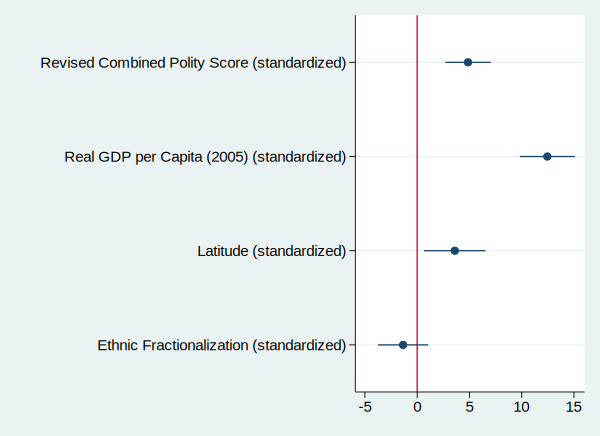

In [15]:
coefplot, xline(0) drop(_cons)

Tvärtemot den tidigare versionen av grafen ser vi nu att effekten av BNP per capita är stark och tydligt signifikant. Att den hamnade så nära noll tidigare berodde bara på variabelns skala. Nu när alla variablerna standardiserats har BNP per capita den tydligaste effekten. Vi ser också lätt att demokrati (Revised Combined Polity Score), BNP per capita och Latitud (mätt som avstånd från ekvatorn) alla har positiva effekter och är signifikanta (konfidensintervallen överlappar inte noll). Etnisk fraktionalisering har en negativ effekt men är inte statistiskt signifikant (konfidensintervallet överlappar noll).

## Flera regressionsmodeller i en graf

Vi kan också göra en graf som visar flera regressionsmodeller på en gång. Då kör vi först alla analyser vi vill göra, sparar resultaten med `estimates store modellnamn` och tar sedan in dem i grafen med `coefplot modellnamn1 modellnamn2`. Nedan kör vi två regressionsanalyser, först med bara demokrati, och sedan med alla oberoende variabler, och sparar dem som "m1" och "m2". För att inte få så mycket output här har jag skrivit `quietly` framför regressionskommandona.

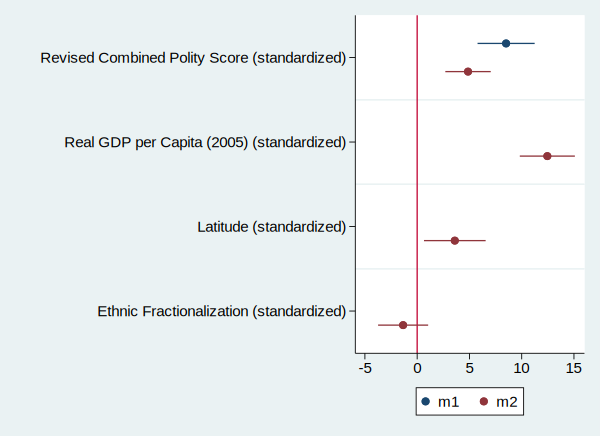

In [21]:
quietly reg ti_cpi std_p_polity2
estimates store m1

quietly reg ti_cpi std_p_polity2 std_gle_rgdpc std_lp_lat_abst std_al_ethnic
estimates store m2

coefplot m1 m2, xline(0) drop(_cons)

Koefficienter från modell 1 ("m1") visas nu i blå färg. Det är bara en - graden av demokrati. Koefficienterna från den andra modellen ("m2") ritas ut med röd färg. Vi kan då se att effekten av demokrati minskar när vi lägger till kontrollvariablerna - pricken flyttas närmare noll.

## Exportera grafen till .png eller .pdf

Medan grafen fortfarande är öppen i Stata kan man sedan skriva `graph export` för att spara grafen som en bildfil eller en pdf. Sedan går det lätt att lägga in den i ett Worddokument eller publicera på webben.

In [22]:
graph export "coefplot_ticpi.pdf", replace

(file coefplot_ticpi.pdf written in PDF format)


## Avslutning

Självklart går det att jobba mycket med grafen för att få den att se snyggare ut - kolla in `help coefplot` för att se vad som går att göra.

Om du har många variabler kan det också vara bra att använda option `keep()` för att fokusera på särskilda koefficienter, kanske i många olika modeller. Då kan man lätt se hur effekten av en huvudvariabel förändras när man kontrollerar för olika saker.

[Tabeller](esttab_sv.html) kan fortfarande vara ett bra sätt att presentera resultat från regressionsanalyser, särskilt om man inte har så många variabler. Många vetenskapliga tidskrifter uppmuntrar dock numera till användning av grafer för att presentera resultat av den här typen, så det är åtminstone bra att känna till hur man skapar och läser av dem.